In [1]:
import os

import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"

from src.analysis import ExampleClipResponses, InhibDecreaseFRCalculator

%load_ext autoreload
%autoreload 2

In [2]:
root = os.path.expanduser("~/PycharmProjects/SpikeToExcite")
model_id = "prediction_0.0017782794100389228_0.3_0.1_0_17_0.2_0.5"
data_root="/home/datasets/natural"  # Set the path of the natural dataset

seizure_example = ExampleClipResponses(root, model_id, data_root=data_root, duration_ms=5000, decrease_gabba=0.8)

In [3]:
def default_plot(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    fs = 16
    ax.xaxis.set_tick_params(width=0, labelsize=fs, pad=8)
    ax.yaxis.set_tick_params(width=0, labelsize=fs, pad=8)
    
def plot_frame(frame, min_v, max_v, ax):
    ax.imshow(frame, vmin=min_v, vmax=max_v, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    
def plot_pokemon_movie_frames(frames, fig, spec):
    for i in range(len(frames)):
        ax = plt.Subplot(fig, spec[i])
        plot_frame(frames[i], min_v=-1, max_v=1, ax=ax)
        fig.add_subplot(ax)
    
def plot_responses(model_response, color, fig, spec): 
    ax = plt.Subplot(fig, spec)
    default_plot(ax)
    ax.plot(model_response, linewidth=2.5, c=color, label="Control model")
    ax.set_ylim([0, 1])
    ax.set_xlim([0, len(control_model_response)])
    ax.set_ylabel("     Firing (Hz)", fontsize=16, labelpad=2)
    ax.set_yticks([0.1, 1])
    ax.set_yticklabels(["0", "120"])
    ax.set_xticks([0, len(control_model_response)])
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    
    return ax
    
def plot_spectrogram(bins, freqs, power, fig, spec):
    ax = plt.Subplot(fig, spec)
    default_plot(ax)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    cb = ax.pcolormesh(bins, freqs, power, vmin=0, vmax=1, cmap="rainbow")
    ax.set_xlabel("")
    ax.set_ylabel("Ch. (Hz)   ", fontsize=16, labelpad=13)
    ax.set_ylim([0, 60])
    ax.set_yticks([0, 50])
    ax.set_yticklabels(["0", "60"])
    ax.set_xticks([0, 10-0.05])
    ax.set_xticklabels([])
    fig.add_subplot(ax)
    
    return ax, cb

## Responses to provocative Pokemon and non-provocative clips

Control model FR = 10.01
Seizure model FR = 88.27


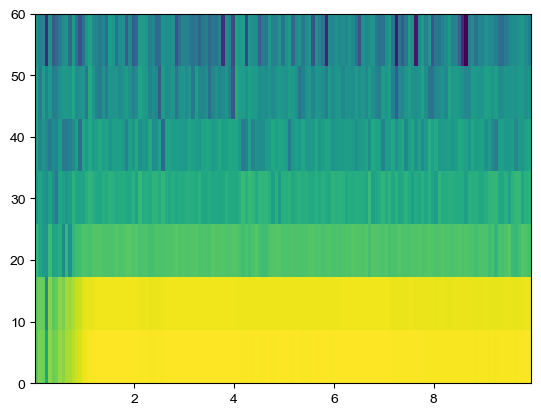

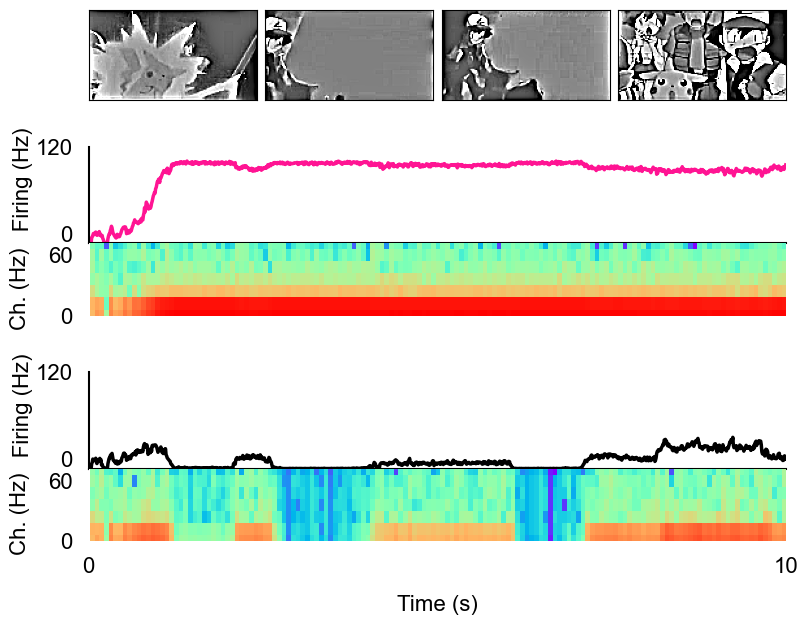

In [4]:
_, control_model_response, seizure_model_response =  seizure_example.get_pokemon_clip_responses(i=-31, j=20, seed=42)
control_model_response = control_model_response.mean(0)
seizure_model_response = seizure_model_response.mean(0)
print(f"Control model FR = {120 * control_model_response.mean():.2f}")
print(f"Seizure model FR = {120 * seizure_model_response.mean():.2f}")

control_power, freqs, bins = ExampleClipResponses.get_specgram_data(control_model_response)
seizure_power, freqs, bins = ExampleClipResponses.get_specgram_data(seizure_model_response)
vmin, vmax = seizure_power.min(), seizure_power.max()
control_power = (control_power - vmin) / (vmax - vmin)
seizure_power = (seizure_power - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(9, 7.5))
fig_spec = gridspec.GridSpec(4, 1, height_ratios=[1.3, 1.2, 0.4, 1.2], hspace=0)
movie_spec = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=fig_spec[0], wspace=0.05, hspace=0)

control_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[3], height_ratios=[4, 3], hspace=0.)
seizure_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[1], height_ratios=[4, 3], hspace=0.0)

plot_pokemon_movie_frames([seizure_example.pokemon_clip[0, i*(237)] for i in range(1, 4+1)], fig, movie_spec)

plot_responses(control_model_response, "black", fig, control_model_spec[0])
ax = plot_spectrogram(bins, freqs, control_power, fig, control_model_spec[1])[0]

plot_responses(seizure_model_response, "deeppink", fig, seizure_model_spec[0])
plot_spectrogram(bins, freqs, seizure_power, fig, seizure_model_spec[1])
ax.set_xticklabels([0, 10])
ax.set_xlabel("Time (s)", fontsize=16, labelpad=13)

plt.savefig(f"{root}/figures/fig2/pokemon.svg", format="svg", transparent=False, bbox_inches="tight")

Control model FR = 5.64
Seizure model FR = 6.84


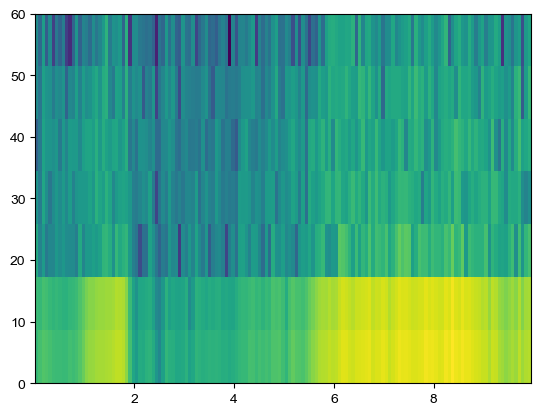

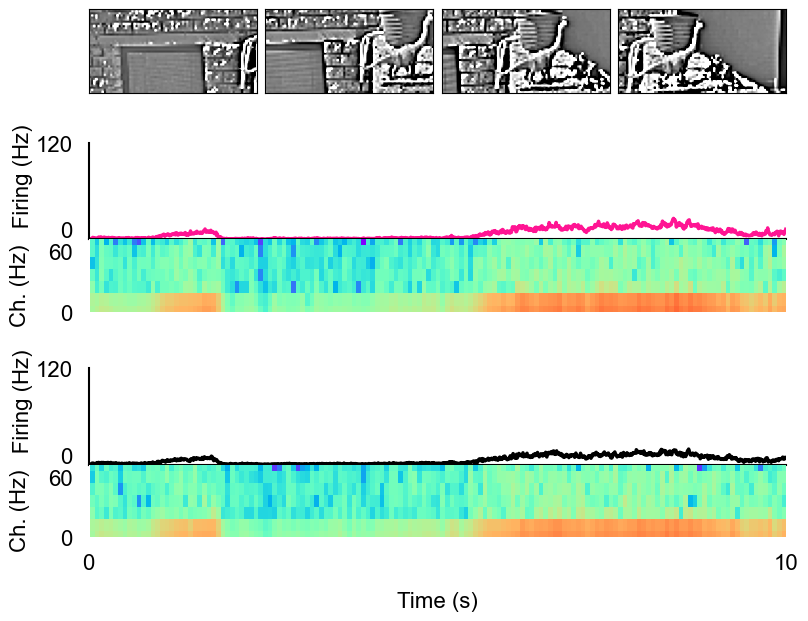

In [5]:
_, control_model_response, seizure_model_response =  seizure_example.get_nonprov_movie_responses(i=-31-10, j=20-4, seed=42)
control_model_response = control_model_response.mean(0)
seizure_model_response = seizure_model_response.mean(0)
print(f"Control model FR = {120 * control_model_response.mean():.2f}")
print(f"Seizure model FR = {120 * seizure_model_response.mean():.2f}")

control_power, freqs, bins = ExampleClipResponses.get_specgram_data(control_model_response)
seizure_power, freqs, bins = ExampleClipResponses.get_specgram_data(seizure_model_response)
control_power = (control_power - vmin) / (vmax - vmin)
seizure_power = (seizure_power - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(9, 7.5))
fig_spec = gridspec.GridSpec(4, 1, height_ratios=[1.3, 1.2, 0.4, 1.2], hspace=0)
movie_spec = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=fig_spec[0], wspace=0.05, hspace=0)

control_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[3], height_ratios=[4, 3], hspace=0.)
seizure_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[1], height_ratios=[4, 3], hspace=0.0)

plot_pokemon_movie_frames([seizure_example.nonprov_clip[0, i*(237)][15:-15, 20:-20] for i in range(1, 4+1)], fig, movie_spec)

plot_responses(control_model_response, "black", fig, control_model_spec[0])
ax, cb = plot_spectrogram(bins, freqs, control_power, fig, control_model_spec[1])

plot_responses(seizure_model_response, "deeppink", fig, seizure_model_spec[0])
plot_spectrogram(bins, freqs, seizure_power, fig, seizure_model_spec[1])
ax.set_xticklabels([0, 10])
ax.set_xlabel("Time (s)", fontsize=16, labelpad=13)

plt.savefig(f"{root}/figures/fig2/dino.svg", format="svg", transparent=False, bbox_inches="tight")

## Supplementary

Control model FR = 9.13
Seizure model FR = 65.01


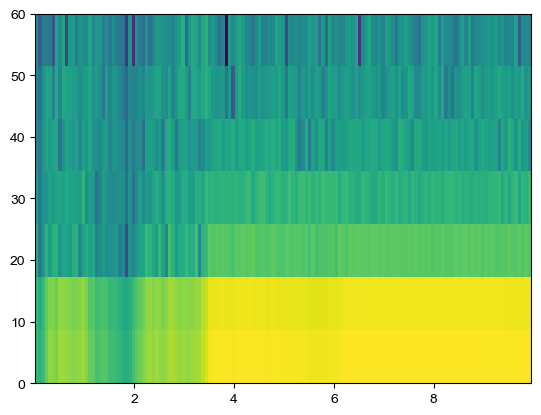

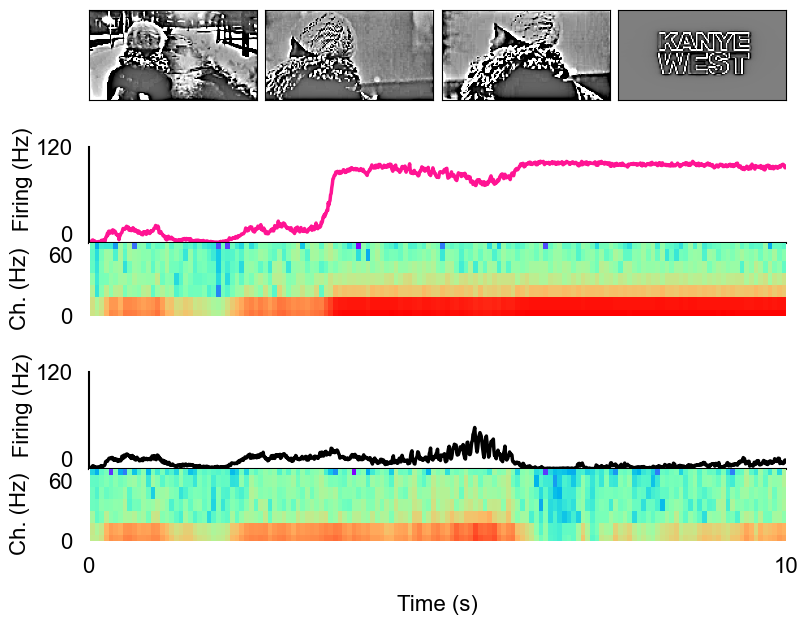

In [6]:
_, control_model_response, seizure_model_response =  seizure_example.get_all_the_lights_clip_responses(i=-31, j=20, seed=42)
control_model_response = control_model_response.mean(0)
seizure_model_response = seizure_model_response.mean(0)
print(f"Control model FR = {120 * control_model_response.mean():.2f}")
print(f"Seizure model FR = {120 * seizure_model_response.mean():.2f}")

control_power, freqs, bins = ExampleClipResponses.get_specgram_data(control_model_response)
seizure_power, freqs, bins = ExampleClipResponses.get_specgram_data(seizure_model_response)
control_power = (control_power - vmin) / (vmax - vmin)
seizure_power = (seizure_power - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(9, 7.5))
fig_spec = gridspec.GridSpec(4, 1, height_ratios=[1.3, 1.2, 0.4, 1.2], hspace=0)
movie_spec = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=fig_spec[0], wspace=0.05, hspace=0)

control_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[3], height_ratios=[4, 3], hspace=0.)
seizure_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[1], height_ratios=[4, 3], hspace=0.0)

plot_pokemon_movie_frames([seizure_example.all_the_lights_clip[0, i*(237)] for i in range(1, 4+1)], fig, movie_spec)

plot_responses(control_model_response, "black", fig, control_model_spec[0])
ax = plot_spectrogram(bins, freqs, control_power, fig, control_model_spec[1])[0]

plot_responses(seizure_model_response, "deeppink", fig, seizure_model_spec[0])
plot_spectrogram(bins, freqs, seizure_power, fig, seizure_model_spec[1])
ax.set_xticklabels([0, 10])
ax.set_xlabel("Time (s)", fontsize=16, labelpad=13)

plt.savefig(f"{root}/figures/supp/all_the_lights.svg", format="svg", transparent=False, bbox_inches="tight")

Control model FR = 6.95
Seizure model FR = 47.88


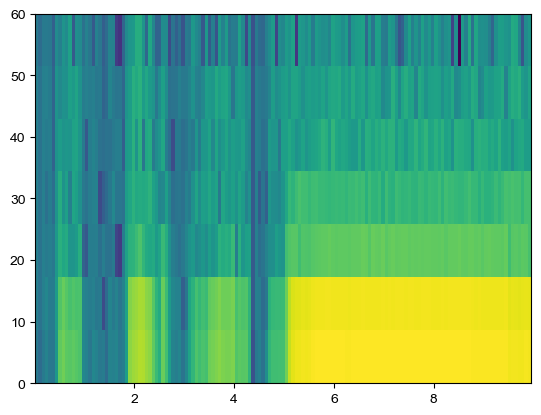

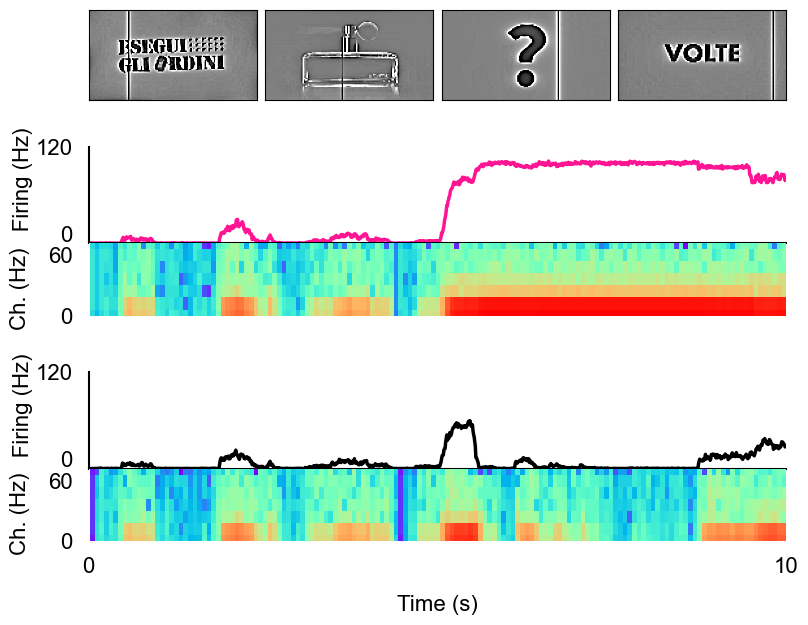

In [7]:
_, control_model_response, seizure_model_response =  seizure_example.get_citroen_clip_responses(i=-31, j=20, seed=42)
control_model_response = control_model_response.mean(0)
seizure_model_response = seizure_model_response.mean(0)
print(f"Control model FR = {120 * control_model_response.mean():.2f}")
print(f"Seizure model FR = {120 * seizure_model_response.mean():.2f}")

control_power, freqs, bins = ExampleClipResponses.get_specgram_data(control_model_response)
seizure_power, freqs, bins = ExampleClipResponses.get_specgram_data(seizure_model_response)
control_power = (control_power - vmin) / (vmax - vmin)
seizure_power = (seizure_power - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(9, 7.5))
fig_spec = gridspec.GridSpec(4, 1, height_ratios=[1.3, 1.2, 0.4, 1.2], hspace=0)
movie_spec = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=fig_spec[0], wspace=0.05, hspace=0)

control_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[3], height_ratios=[4, 3], hspace=0.)
seizure_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[1], height_ratios=[4, 3], hspace=0.0)

plot_pokemon_movie_frames([seizure_example.citroen_clip[0, i*(237)] for i in range(1, 4+1)], fig, movie_spec)

plot_responses(control_model_response, "black", fig, control_model_spec[0])
ax = plot_spectrogram(bins, freqs, control_power, fig, control_model_spec[1])[0]

plot_responses(seizure_model_response, "deeppink", fig, seizure_model_spec[0])
plot_spectrogram(bins, freqs, seizure_power, fig, seizure_model_spec[1])
ax.set_xticklabels([0, 10])
ax.set_xlabel("Time (s)", fontsize=16, labelpad=13)

plt.savefig(f"{root}/figures/supp/citroen.svg", format="svg", transparent=False, bbox_inches="tight")

Control model FR = 6.25
Seizure model FR = 64.56


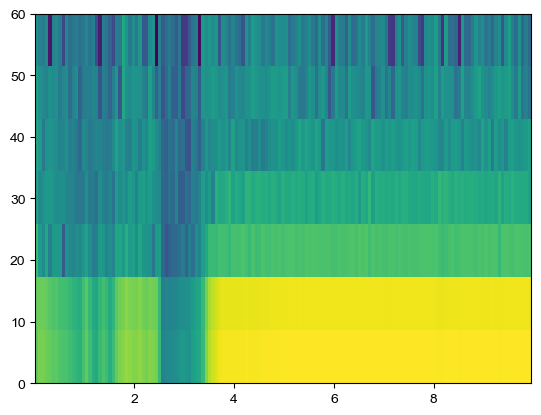

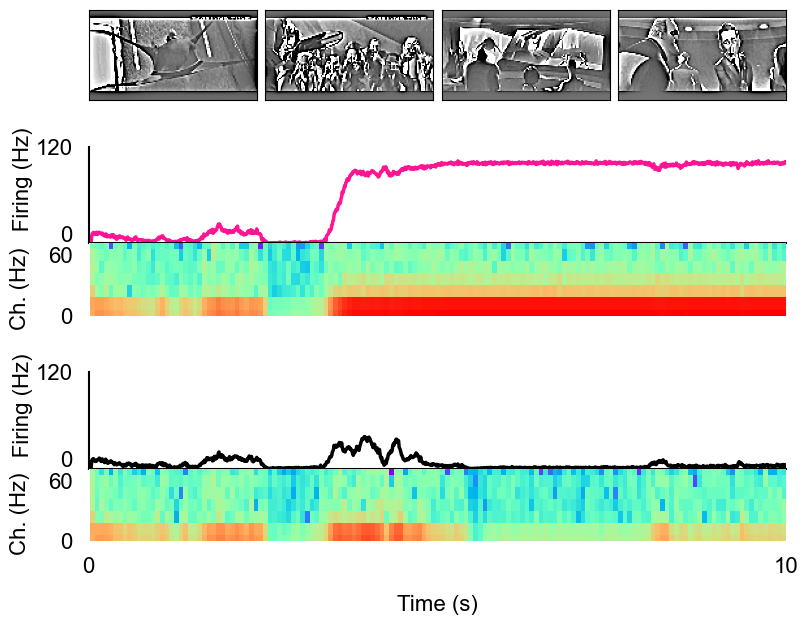

In [8]:
_, control_model_response, seizure_model_response =  seizure_example.get_incredibles_clip_responses(i=-31, j=20, seed=42)
control_model_response = control_model_response.mean(0)
seizure_model_response = seizure_model_response.mean(0)
print(f"Control model FR = {120 * control_model_response.mean():.2f}")
print(f"Seizure model FR = {120 * seizure_model_response.mean():.2f}")

control_power, freqs, bins = ExampleClipResponses.get_specgram_data(control_model_response)
seizure_power, freqs, bins = ExampleClipResponses.get_specgram_data(seizure_model_response)
control_power = (control_power - vmin) / (vmax - vmin)
seizure_power = (seizure_power - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(9, 7.5))
fig_spec = gridspec.GridSpec(4, 1, height_ratios=[1.3, 1.2, 0.4, 1.2], hspace=0)
movie_spec = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=fig_spec[0], wspace=0.05, hspace=0)

control_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[3], height_ratios=[4, 3], hspace=0.)
seizure_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[1], height_ratios=[4, 3], hspace=0.0)

plot_pokemon_movie_frames([seizure_example.incredibles_clip[0, i*(237)] for i in range(1, 4+1)], fig, movie_spec)

plot_responses(control_model_response, "black", fig, control_model_spec[0])
ax = plot_spectrogram(bins, freqs, control_power, fig, control_model_spec[1])[0]

plot_responses(seizure_model_response, "deeppink", fig, seizure_model_spec[0])
plot_spectrogram(bins, freqs, seizure_power, fig, seizure_model_spec[1])
ax.set_xticklabels([0, 10])
ax.set_xlabel("Time (s)", fontsize=16, labelpad=13)

plt.savefig(f"{root}/figures/supp/incredibles.svg", format="svg", transparent=False, bbox_inches="tight")

Control model FR = 4.14
Seizure model FR = 87.39


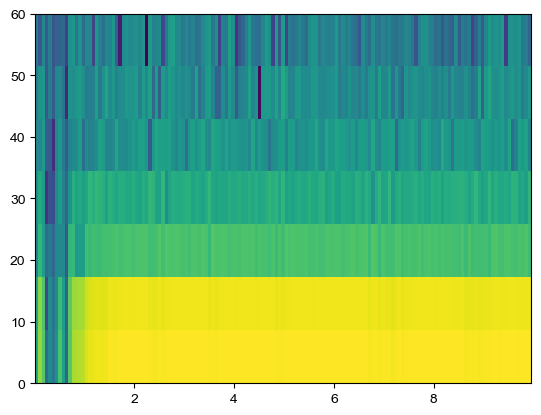

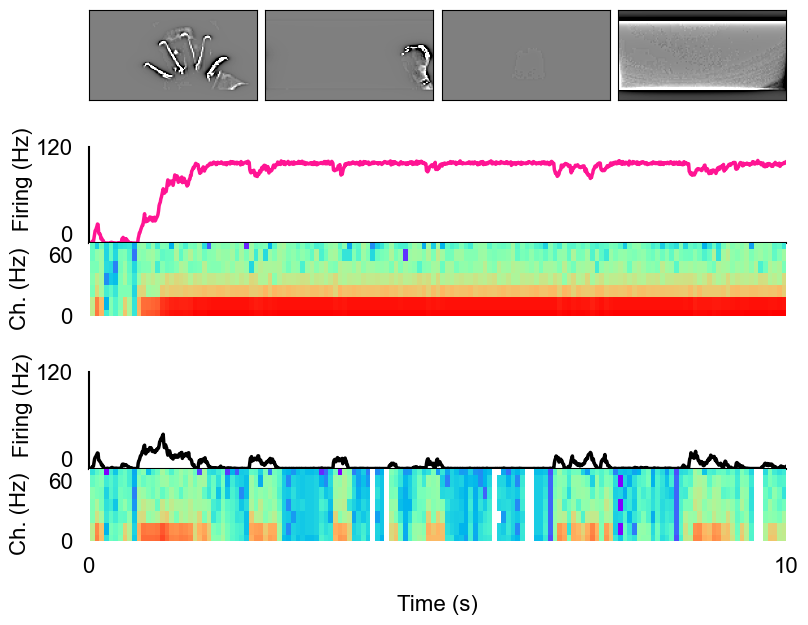

In [9]:
_, control_model_response, seizure_model_response =  seizure_example.get_take_my_breath_clip_responses(i=20, j=20, seed=42)
control_model_response = control_model_response.mean(0)
seizure_model_response = seizure_model_response.mean(0)
print(f"Control model FR = {120 * control_model_response.mean():.2f}")
print(f"Seizure model FR = {120 * seizure_model_response.mean():.2f}")

control_power, freqs, bins = ExampleClipResponses.get_specgram_data(control_model_response)
seizure_power, freqs, bins = ExampleClipResponses.get_specgram_data(seizure_model_response)
control_power = (control_power - vmin) / (vmax - vmin)
seizure_power = (seizure_power - vmin) / (vmax - vmin)

fig = plt.figure(figsize=(9, 7.5))
fig_spec = gridspec.GridSpec(4, 1, height_ratios=[1.3, 1.2, 0.4, 1.2], hspace=0)
movie_spec = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=fig_spec[0], wspace=0.05, hspace=0)

control_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[3], height_ratios=[4, 3], hspace=0.)
seizure_model_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[1], height_ratios=[4, 3], hspace=0.0)

plot_pokemon_movie_frames([seizure_example.take_my_breath_clip[0, i*(237)] for i in range(1, 4+1)], fig, movie_spec)

plot_responses(control_model_response, "black", fig, control_model_spec[0])
ax = plot_spectrogram(bins, freqs, control_power, fig, control_model_spec[1])[0]

plot_responses(seizure_model_response, "deeppink", fig, seizure_model_spec[0])
plot_spectrogram(bins, freqs, seizure_power, fig, seizure_model_spec[1])
ax.set_xticklabels([0, 10])
ax.set_xlabel("Time (s)", fontsize=16, labelpad=13)

plt.savefig(f"{root}/figures/supp/take_my_breath.svg", format="svg", transparent=False, bbox_inches="tight")

In [10]:
inhib_rf_calculator = InhibDecreaseFRCalculator(root, model_id)

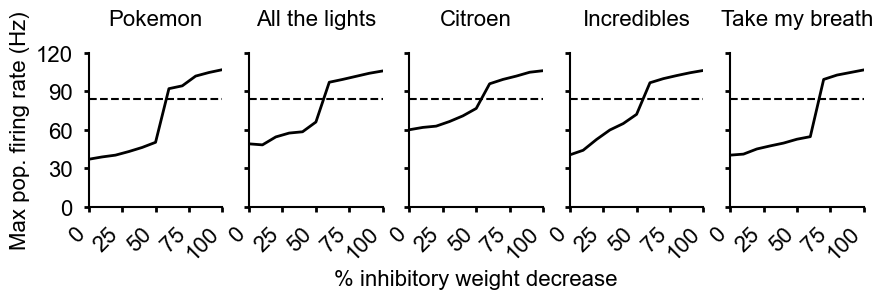

In [11]:
def plot_mean_pop_fr(title, fr_list, ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    fs = 16
    ax.xaxis.set_tick_params(width=2, labelsize=fs, pad=8)
    ax.yaxis.set_tick_params(width=2, labelsize=fs, pad=8)
    ax.plot(fr_list, color="black", lw=2)
    ax.set_ylim([0, 120])
    ax.set_yticks([0, 30, 60, 90, 120])
    ax.set_xlim([0, 10])
    ax.set_xticks([0, 2.5, 5, 7.5, 10])
    ax.set_xticklabels([0, 25, 50, 75, 100])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(title, fontsize=16, pad=20)
    ax.plot([0, 10], [84, 84], "--", c="black")
    
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10, 2))

plot_mean_pop_fr("Pokemon", inhib_rf_calculator.pokemon_fr_list, axs[0])
plot_mean_pop_fr("All the lights", inhib_rf_calculator.all_the_lights_fr_list, axs[1])
plot_mean_pop_fr("Citroen", inhib_rf_calculator.citroen_fr_list, axs[2])
plot_mean_pop_fr("Incredibles", inhib_rf_calculator.incredibles_fr_list, axs[3])
plot_mean_pop_fr("Take my breath", inhib_rf_calculator.take_my_breath_fr_list, axs[4])
axs[0].set_ylabel("Max pop. firing rate (Hz)", fontsize=16, labelpad=4)
axs[2].set_xlabel("% inhibitory weight decrease", fontsize=16, labelpad=4)
plt.savefig(f"{root}/figures/supp/max_pop_fr_over_inhibit_decrease.svg", format="svg", transparent=False, bbox_inches="tight")